# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

In [ ]:
#usage:
#conda env python 3.5 openAI in mac, kernel also openAI
#sudo -H pip install keras==2.1.2

In [324]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [325]:
%%bash
pwd

/Users/parksoy/Desktop/Soyoung_Udacity_ND_DeepLearning/6.Deep_Reinforcement_Learning/RL-Quadcopter-2-master


In [326]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.   
- `agents/`: Folder containing reinforcement learning agents.  
    - `policy_search.py`: A sample agent has been provided here.  
    - `agent.py`: Develop your agent here.   
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.   

 
For this project, you will <font color='red'>  define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.</font>   Later in this notebook, you will learn more about how to amend this file.

You will also <font color='red'> design a reinforcement learning agent in `agent.py` </font>  to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to <font color='red'> define a `model.py` file defining any needed neural network architectures. </font>


## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will <font color='red'> implement in `agents/agent.py` will have a far more intelligent method for selecting actions! </font>

In [327]:
import random

class Basic_Random_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        #print("new_thrust: ", new_thrust)
        #print("return: ",[new_thrust + random.gauss(0., 1.) for x in range(4)])
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

#### Given Sample Code #1: _Writing to data.txt:_    
After __agent.act() and task.step(rotor_speeds)__, Writing to data.txt task.sim.time+task.sim.pose+task.sim.v+task.sim.angular_v+rotor_speeds

In [329]:
import csv
import numpy as np
from task import Task
from policy_search import PolicySearch_Agent #from agent import DDPG_agent


# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Random_Agent(task) #PolicySearch_Agent #Basic_Agent(task) #DDPG_agent(task) #
done = False
labels = ['time', 'x', 'y', 'z', \
          'phi', 'theta', 'psi', \
          'x_velocity','y_velocity', 'z_velocity',\
          'phi_velocity', 'theta_velocity','psi_velocity',\
          'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    idx=0
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break
        idx+=1

print("For ",agent, idx+1,"lines written into data.txt file!")


For  <__main__.Basic_Random_Agent object at 0x11b0e7b70> 84 lines written into data.txt file!


#### Given Sample Code #2 : _Visualization of states_

In [330]:
len(results.keys()), results.keys(), len(results['time']), int(max(results['time']))

(17,
 dict_keys(['psi', 'x', 'psi_velocity', 'rotor_speed4', 'y_velocity', 'phi_velocity', 'z_velocity', 'rotor_speed3', 'y', 'phi', 'time', 'z', 'rotor_speed2', 'theta', 'x_velocity', 'rotor_speed1', 'theta_velocity']),
 84,
 5)

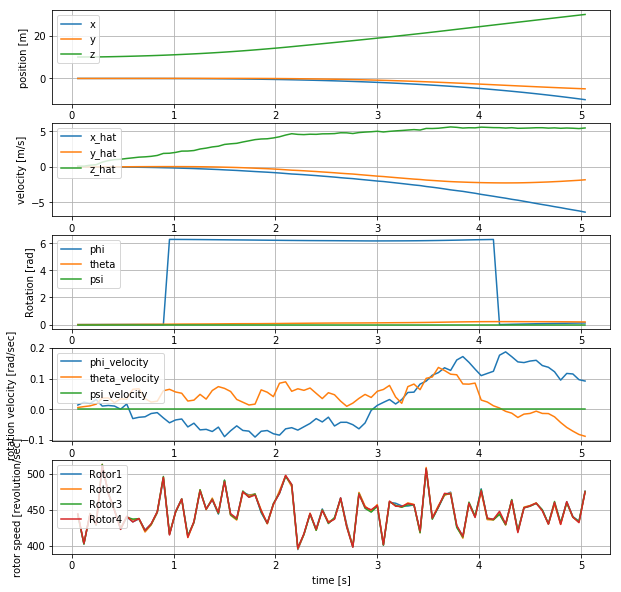

In [331]:
import matplotlib.pyplot as plt
%matplotlib inline


def plot_states_in_timeseries():
    f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(10,10)) #sharex=True
    
    #__vposition__ of the quadcopter.
    ax1.plot(results['time'][-84:], results['x'][-84:], label='x')
    ax1.plot(results['time'][-84:], results['y'][-84:], label='y')
    ax1.plot(results['time'][-84:], results['z'][-84:], label='z')
    ax1.set_xlabel("time [s]")
    ax1.set_ylabel("position [m]")
    ax1.legend(loc='upper left')
    ax1.grid()

    #__velocity__ of the quadcopter.
    ax2.plot(results['time'][-84:], results['x_velocity'][-84:], label='x_hat')
    ax2.plot(results['time'][-84:], results['y_velocity'][-84:], label='y_hat')
    ax2.plot(results['time'][-84:], results['z_velocity'][-84:], label='z_hat')
    ax2.set_xlabel("time [s]")
    ax2.set_ylabel("velocity [m/s]")
    ax2.legend(loc='upper left')
    ax2.grid()

    #__Euler angles__ (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),
    ax3.plot(results['time'][-84:], results['phi'][-84:], label='phi')
    ax3.plot(results['time'][-84:], results['theta'][-84:], label='theta')
    ax3.plot(results['time'][-84:], results['psi'][-84:], label='psi')
    ax3.set_xlabel("time [s]")
    ax3.set_ylabel("Rotation [rad]")
    ax3.legend(loc='upper left')
    ax3.grid()

    #__rotation velocities__ (in radians per second) 
    ax4.plot(results['time'][-84:], results['phi_velocity'][-84:], label='phi_velocity')
    ax4.plot(results['time'][-84:], results['theta_velocity'][-84:], label='theta_velocity')
    ax4.plot(results['time'][-84:], results['psi_velocity'][-84:], label='psi_velocity')
    ax4.set_xlabel("time [s]")
    ax4.set_ylabel("rotation velocity [rad/sec]")
    ax4.legend(loc='upper left')
    ax4.grid()

    #rotor speed [revolution/sec]
    ax5.plot(results['time'][-84:], results['rotor_speed1'][-84:], label='Rotor1')
    ax5.plot(results['time'][-84:], results['rotor_speed2'][-84:], label='Rotor2')
    ax5.plot(results['time'][-84:], results['rotor_speed3'][-84:], label='Rotor3')
    ax5.plot(results['time'][-84:], results['rotor_speed4'][-84:], label='Rotor4')
    ax5.set_xlabel("time [s]")
    ax5.set_ylabel("rotor speed [revolution/sec]")
    ax5.legend(loc='upper left')
    ax5.grid()
    
plot_states_in_timeseries()

Finally, you can use the code cell below to print the agent's choice of actions.

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

#### Given Sample Code #3 : print the agent's choice of actions

In [332]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print("task.sim.pose [m, rad] =",task.sim.pose)
print("task.sim.v [m/s] =",task.sim.v)
print("task.sim.angular_v [rad/sec] =",task.sim.angular_v)

task.sim.pose [m, rad] = [-9.88562563 -4.82983568 29.8321885   0.12074029  0.19445146  0.        ]
task.sim.v [m/s] = [-6.35615613 -1.8030613   5.487099  ]
task.sim.angular_v [rad/sec] = [ 0.09172705 -0.08795937  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by <font color='red'> including the velocity information.</font>  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task: task.py

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  <font color='red'> To set the size of the state (`state_size`), we must take action repeats into account.  </font>
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent: agent.py instead of simple policy_search.py

The sample agent given in `agents/policy_search.py` uses a <font color='red'> very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. </font> Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

#### Given Sample Code #4 :  _policy-search.py is simple linear policy to comput action as state*weight_

In [333]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.task import basic_Task

num_episodes = 100#0
target_pos = np.array([0., 0., 10.])
task = basic_Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 
rewards_list=[]

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            rewards_list.append((i_episode, agent.score))
            break
            
    sys.stdout.flush()

Episode =  100, score =  -0.309 (best =  -0.082), noise_scale = 3.2555

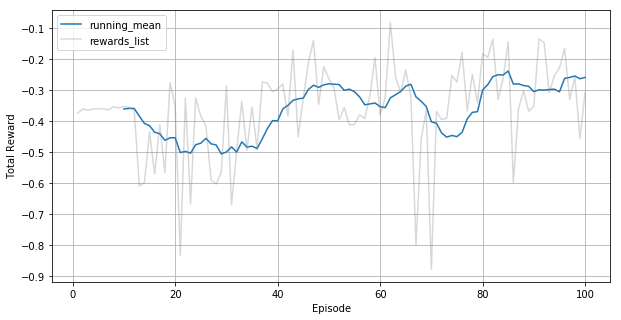

In [334]:
## TODO: Plot the rewards. 
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

def plot_rewards(rewards_list):
    eps, rews = np.array(rewards_list).T  #(ep, total_reward)
    smoothed_rews = running_mean(rews, 10)
    

    f, (ax) = plt.subplots(1, 1, figsize=(10,5)) #sharex=True
    ax.plot(eps[-len(smoothed_rews):], smoothed_rews, label='running_mean')
    ax.plot(eps, rews, color='grey', alpha=0.3, label='rewards_list')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Total Reward')
    ax.legend()
    ax.grid()

plot_rewards(rewards_list)

This agent should perform very poorly on this task.  And that's where you come in!

# Define the Task, Design the Agent, and Train Your Agent!    

<font color='red'>   
Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  </font>

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to <font color='red'> define your own agent in `agents/agent.py`. </font> You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. <font color='red'>  Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  </font> If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Task : Take Off was focused

Episode = 1000/1000, total_rewards = 1087.014 
With  <agents.agent.DDPG_agent object at 0x173c2f8d0> <tasks.task.TakeOff_Task object at 0x173c2f940> ,finished training, writing to takeOff_data.txt file!


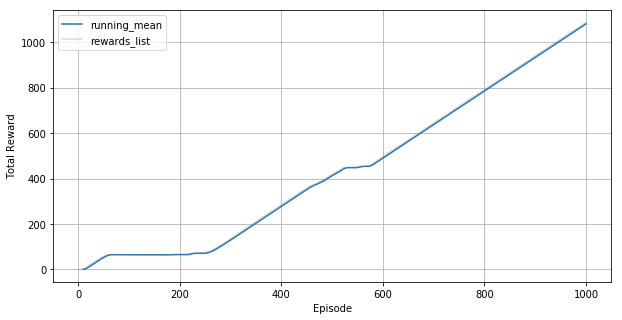

In [354]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG_agent, PolicySearch_Agent
from tasks.task import basic_Task, TakeOff_Task


# Write to txt file Setup
file_output = 'takeOff_data.txt'                 
labels = ['time', 'x', 'y', 'z', \
          'phi', 'theta', 'psi', \
          'x_velocity','y_velocity', 'z_velocity',\
          'phi_velocity', 'theta_velocity','psi_velocity',\
          'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
num_episodes = 1000

#Training setup
target_pos = np.array([0., 0., 100.])
task = TakeOff_Task(target_pos=target_pos) #basic_Task(target_pos=target_pos)
agent = DDPG_agent(task) 
rewards_list = []
total_rewards=0

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            #print("episode=", i_episode, "Processing  agent.act , task.step(action), agent.step(reward, done)...")
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            total_rewards += reward
            to_write = [task.sim.time]+list(task.sim.pose)+list(task.sim.v)+list(task.sim.angular_v)+list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
        
            if done:
                print("\rEpisode = {:4d}/{}, total_rewards = {:7.3f} "\
                      .format(i_episode, num_episodes, total_rewards), end="")  # [debug]
                rewards_list.append((i_episode, total_rewards))
                #print("\n")
                break
        sys.stdout.flush()

print("\nWith ",agent, task, ",finished training, writing to takeOff_data.txt file!")

## TODO: Plot the rewards.
plot_rewards(rewards_list)

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

## Plot very first episode: Before training

If quadcopter didn't crash, total 5min long data are 84 datapoints. If plotting first 84points, multiple episodes were reset and restarted. It means, quadcopter doesn't know how to take off at all.

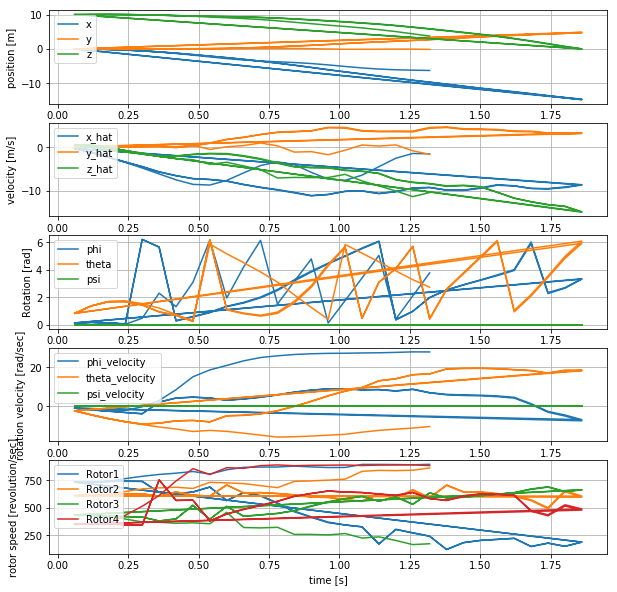

In [355]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1, figsize=(10,10)) #sharex=True
    
#__vposition__ of the quadcopter.
ax1.plot(results['time'][:84], results['x'][:84], label='x')
ax1.plot(results['time'][:84], results['y'][:84], label='y')
ax1.plot(results['time'][:84], results['z'][:84], label='z')
ax1.set_xlabel("time [s]")
ax1.set_ylabel("position [m]")
ax1.legend(loc='upper left')
ax1.grid()

#__velocity__ of the quadcopter.
ax2.plot(results['time'][:84], results['x_velocity'][:84], label='x_hat')
ax2.plot(results['time'][:84], results['y_velocity'][:84], label='y_hat')
ax2.plot(results['time'][:84], results['z_velocity'][:84], label='z_hat')
ax2.set_xlabel("time [s]")
ax2.set_ylabel("velocity [m/s]")
ax2.legend(loc='upper left')
ax2.grid()

#__Euler angles__ (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),
ax3.plot(results['time'][:84], results['phi'][:84], label='phi')
ax3.plot(results['time'][:84], results['theta'][:84], label='theta')
ax3.plot(results['time'][:84], results['psi'][:84], label='psi')
ax3.set_xlabel("time [s]")
ax3.set_ylabel("Rotation [rad]")
ax3.legend(loc='upper left')
ax3.grid()

#__rotation velocities__ (in radians per second) 
ax4.plot(results['time'][:84], results['phi_velocity'][:84], label='phi_velocity')
ax4.plot(results['time'][:84], results['theta_velocity'][:84], label='theta_velocity')
ax4.plot(results['time'][:84], results['psi_velocity'][:84], label='psi_velocity')
ax4.set_xlabel("time [s]")
ax4.set_ylabel("rotation velocity [rad/sec]")
ax4.legend(loc='upper left')
ax4.grid()

#rotor speed [revolution/sec]
ax5.plot(results['time'][:84], results['rotor_speed1'][:84], label='Rotor1')
ax5.plot(results['time'][:84], results['rotor_speed2'][:84], label='Rotor2')
ax5.plot(results['time'][:84], results['rotor_speed3'][:84], label='Rotor3')
ax5.plot(results['time'][:84], results['rotor_speed4'][:84], label='Rotor4')
ax5.set_xlabel("time [s]")
ax5.set_ylabel("rotor speed [revolution/sec]")
ax5.legend(loc='upper left')
ax5.grid()

Just to double check, first 84 datapoints shows time never reached to 5min.

In [356]:
print(results['time'][:84]) #Never be able to stay as long as 5sec.

[0.06, 0.12000000000000001, 0.18, 0.23999999999999996, 0.3, 0.36000000000000004, 0.4200000000000001, 0.48000000000000015, 0.5400000000000001, 0.6000000000000002, 0.6600000000000003, 0.7200000000000003, 0.7800000000000004, 0.8400000000000004, 0.9000000000000005, 0.9600000000000005, 1.0200000000000005, 1.0800000000000005, 1.1400000000000006, 1.2000000000000006, 1.2600000000000007, 1.3200000000000007, 1.3800000000000008, 1.4400000000000008, 1.5000000000000009, 1.560000000000001, 1.620000000000001, 1.680000000000001, 1.740000000000001, 1.8000000000000012, 1.8600000000000012, 0.06, 0.12000000000000001, 0.18, 0.23999999999999996, 0.3, 0.36000000000000004, 0.4200000000000001, 0.48000000000000015, 0.5400000000000001, 0.6000000000000002, 0.6600000000000003, 0.7200000000000003, 0.7800000000000004, 0.8400000000000004, 0.9000000000000005, 0.9600000000000005, 1.0200000000000005, 1.0800000000000005, 1.1400000000000006, 1.2000000000000006, 1.2600000000000007, 1.3200000000000007, 1.3800000000000008, 1

## Plot very last episode: after 1000 episode training

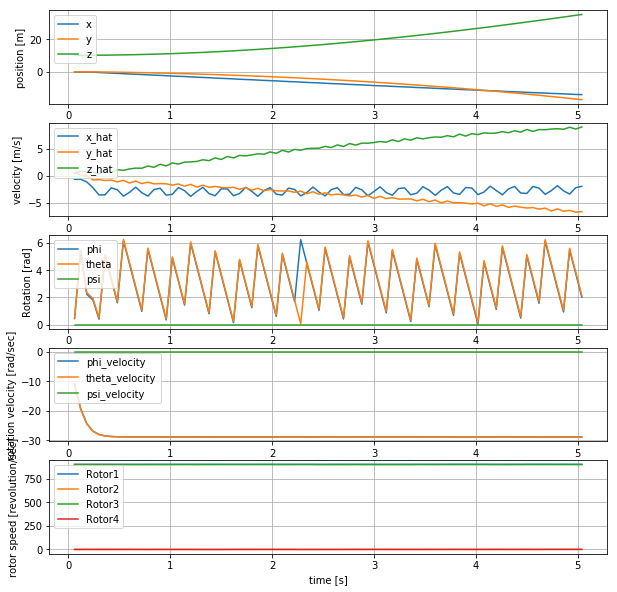

In [357]:
plot_states_in_timeseries()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:  

Take Off was focused as a task. Reward function consists of two parts:

(1)`reward = np.tanh(1 - 0.0003*(abs(self.sim.pose[:3] - self.target_pos)).sum())`   
 : The given base task suggests to use reward as *proximity between the current position and target position*. The constant for proximity was significantly reduced from the given baseline number 0.3 to avoid reward being decreasing over the course of training.
        
(2) `if self.sim.time < self.sim.runtime: reward = -0.0001`
 : Penalty was given to crashing.
           

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

Q1: What learning algorithm(s) did you try? What worked best for you?    
A1: The given actor-critic approach and its code in the project description refered in _Lillicrap, Timothy P., et al., 2015. Continuous Control with Deep Reinforcement Learning_ were directly taken and used without changing. Deep Deterministic Policy Gradients or DDPG is the main algorithm that was implemented in conjucntion with neural network frame using Keras. 

Q2: What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?  
A2: The given hyperparameters, the default values, lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False were used without changing. 
(https://keras.io/optimizers/#adam)


Q3: What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.  
A3: The given architecture was used without changing. 
 
For actor(policy) model, 3 fully connected hidden layers of size 32,64,32 were used, each was followed by relu activation function. Final output layer was fully connected followed by sigmoid activation. Adam Optimizer was used to reduce the loss, action gradient.   

For critic(action value) model, 2 fully connected hidden layers of size 32,64 are for state pathway with relu,  another 2 fully connected hidden layer(s) are built for action pathway with relu. These two pathways are combineed followed by relu. For input pair of (states, actions), outputs Q_values were predicted using Adam optimizer and action gradients is to be fed to actor model back.  




**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

Q1: Was it an easy task to learn or hard? Was there a gradual learning curve, or an aha moment?
A1: In the scale of 1000 in y axis (total accumulated reward), learning seems to be pretty much in linear fashion over the course of time except a couple of aha moments. Step functions like aha moments imply learning wasn't only continuous/easy all the time. 

Q2: How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)
A2: rewards at the very last episodes is ~1100.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

Q1: What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)   
A1:  
Getting started was the definetely hardest. Understanding principles covered in the lectures and understanding problem statement/the given example codes/the reference paper are actually pretty much two different big tasks. Also, it was not clear how to define tasks without searching for forum.  If time allows, 
    - Now understanding other folks have done take off and hover and landing tasks all seperately, I definetely want to try implementing all those tasks and integrate with simulator, so I can monitor where/how learning is sufficient or insufficient more intuitively rather than multiple 2D plots as I did in this notebook.    
    - Also, I want to learn any trick how to test out different hyperparameter sets in more automated manner. This project took long time to finish up on time, so I didn't perform much hyperparemeter optimization. I wish Udacity can cover how to effectively set "many" hyperparameters.  
    - GPU use seems to be necessary. Forum suggests CPU was sufficient, but 1000 episode traning took a good hour, so hyperparameter tunning was not even tried.   

Q2: Did you find anything interesting in how the quadcopter or your agent behaved?   
A2: Final performance in state plots suggest it really smoothly reaches to the target z position, although x and y positions are slightly off from the target, and also theta velocity went down to 30rad/s (the rotated to opposite direction to the direction of action torque) and only two rotors were signiticantly used, not the other two. 3D simulator along with tragectory is necessary to understand how this behaves more intuitively.
